In [1]:
GIT_REPO = '/Users/virgilefoy/Workspace/point_cloud_analysis_and_neural_udfs/'
import sys
sys.path.append(GIT_REPO)

from src.point_cloud_analysis import compute_indicator_on_surface
from src.utils.shape_encoding import load_mesh

import trimesh
from trimesh.sample import sample_surface, sample_surface_even

import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix

from sklearn.preprocessing import MinMaxScaler

import time as T

In [2]:
print('Python ', sys.version)
print('numpy ', np.__version__)
print('trimesh', trimesh.__version__)
import matplotlib
print('matplotlib', matplotlib.__version__)
print('scipy', scipy.__version__)
import sklearn
print('scikit-learn', sklearn.__version__)

Python  3.8.19 | packaged by conda-forge | (default, Mar 20 2024, 12:50:25) 
[Clang 15.0.7 ]
numpy  1.24.4
trimesh 4.4.1
matplotlib 3.7.5
scipy 1.10.1
scikit-learn 1.3.2


In [3]:
def load_shapenet_mesh(cat, shape_index):
    
    mesh_path = f'/Users/virgilefoy/Dropbox/shapenet_meshes/{cat}s/mesh_{shape_index}.stl'
    mesh = trimesh.load_mesh(mesh_path)
    
    return mesh

def sample_surface_and_compute_indicator(mesh, n_surface_points, k_neighbors, indicator, decision_threshold=None):

    surface_points = np.array(sample_surface(mesh, n_surface_points)[0])

    indicator_values = compute_indicator_on_surface(surface_points, indicator, k_neighbors)
        
    if decision_threshold is not None:
        indicator_values = 1 * (indicator_values > decision_threshold)   
    
    return surface_points, indicator_values

def find_closest_indicator_value(query_points, known_points, indicator_values):
    distances = cdist(query_points, known_points)
    closest_indices = np.argmin(distances, axis=1)
    output = indicator_values[closest_indices]
    return output

def rotate_yz_plane(points):
    theta = np.radians(90)  # Convert angle to radians
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    # Define the rotation matrix
    Rx = np.array([[1, 0, 0],
                   [0, cos_theta, -sin_theta],
                   [0, sin_theta, cos_theta]])

    # Apply the rotation to the points
    rotated_points = np.dot(points, Rx.T)  # Transpose of Rx is used because we want to rotate column vectors

    return rotated_points

def plot_indicator_on_surface(mesh, points, indicator_values, n_plot_points, figsize=(5,5), rotate_yz=False, save_to=None):

    plot_points = np.array(sample_surface(mesh, n_plot_points)[0])
    indicator_plot_points = find_closest_indicator_value(plot_points, points, indicator_values)

    fig = plt.figure(figsize=figsize)

    if rotate_yz:
        plot_points = rotate_yz_plane(plot_points)
        
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(plot_points[:, 0], plot_points[:, 1], plot_points[:, 2], c=indicator_plot_points, cmap='viridis_r', s=1)
    ax.set_xlim(-.4,.4)
    ax.set_ylim(-.4,.4)
    ax.set_zlim(-.4,.4)
    ax.axis('off')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.tight_layout()
    if save_to is not None:
        plt.savefig(save_to)
    plt.show()

## Plot indicator on single shape

Single shape indicator computation:  2.1  s.


<IPython.core.display.Javascript object>


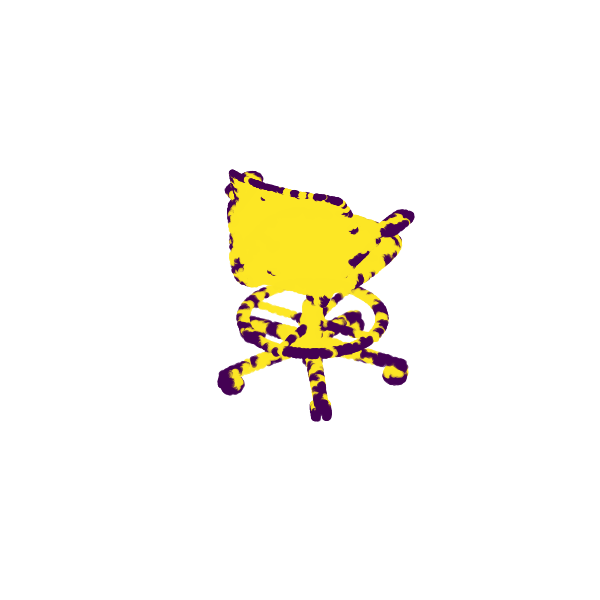

Single plot runtime:  0.5  s.


In [4]:
%matplotlib notebook

cat = 'chair' # 'chair', 'table', 'car', 'airplane'
shape_index = 0 # index in the directory of meshes

indicator = 'ks_log_pvalues' # 'ks_log_pvalues', 'pauly'

save_to = None

n_surface_points = 2000
k_neighbors = 30
decision_threshold = 1.3

n_plot_points = 30000
rotate_yz=True

mesh = load_shapenet_mesh(cat, shape_index)

t0=T.time()
points, indicator_values = sample_surface_and_compute_indicator(mesh, n_surface_points, k_neighbors, indicator, decision_threshold)
print('Single shape indicator computation: ', str(np.round(T.time()-t0,1)), ' s.')

t0=T.time()
plot_indicator_on_surface(mesh, points, indicator_values, n_plot_points, rotate_yz=rotate_yz, figsize=(3,3), save_to=save_to)
print('Single plot runtime: ', str(np.round(T.time()-t0,1)), ' s.')

## Choice of $k_{neighbors}$

====
k=10
====
Single shape indicator computation:  1.3  s.


<IPython.core.display.Javascript object>


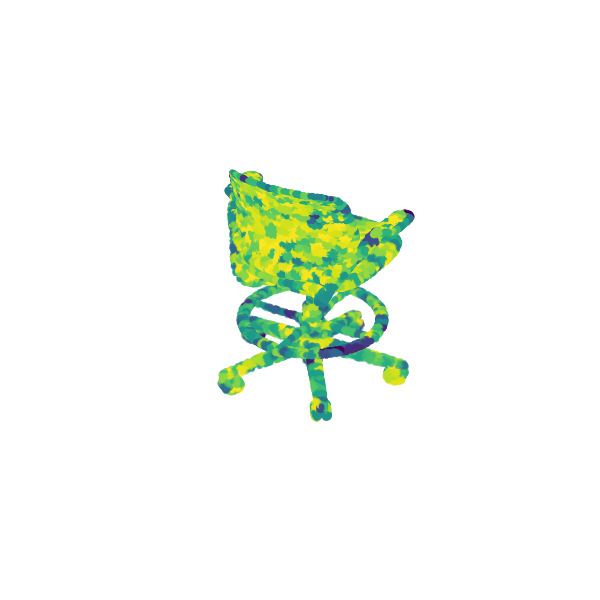

Single plot runtime:  0.4  s.
====
k=20
====
Single shape indicator computation:  1.7  s.


<IPython.core.display.Javascript object>


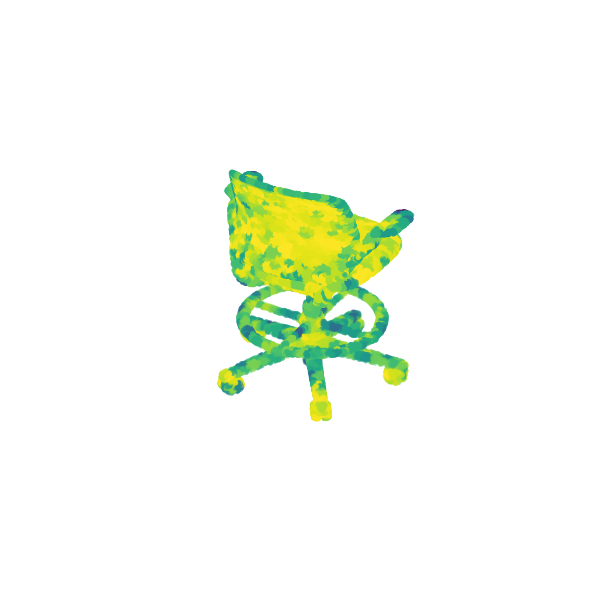

Single plot runtime:  0.4  s.
====
k=30
====
Single shape indicator computation:  2.2  s.


<IPython.core.display.Javascript object>


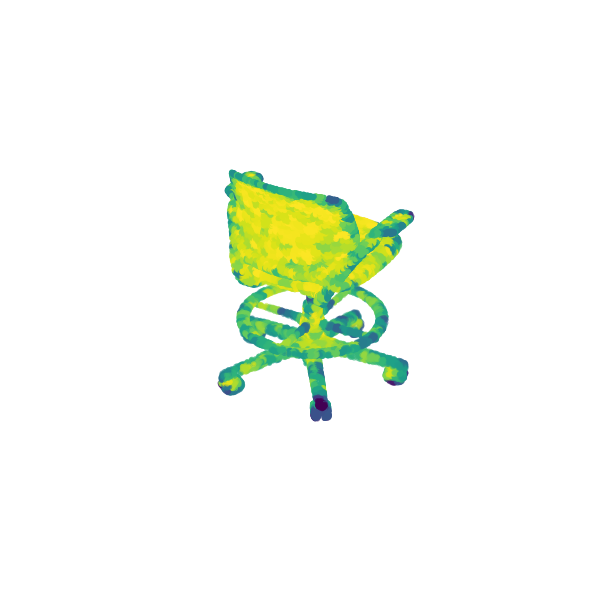

Single plot runtime:  0.4  s.
====
k=40
====
Single shape indicator computation:  2.7  s.


<IPython.core.display.Javascript object>


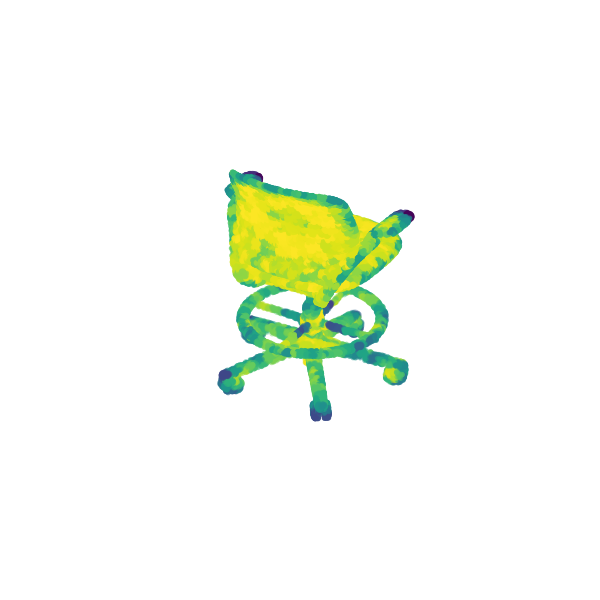

Single plot runtime:  0.4  s.
====
k=50
====
Single shape indicator computation:  3.0  s.


<IPython.core.display.Javascript object>


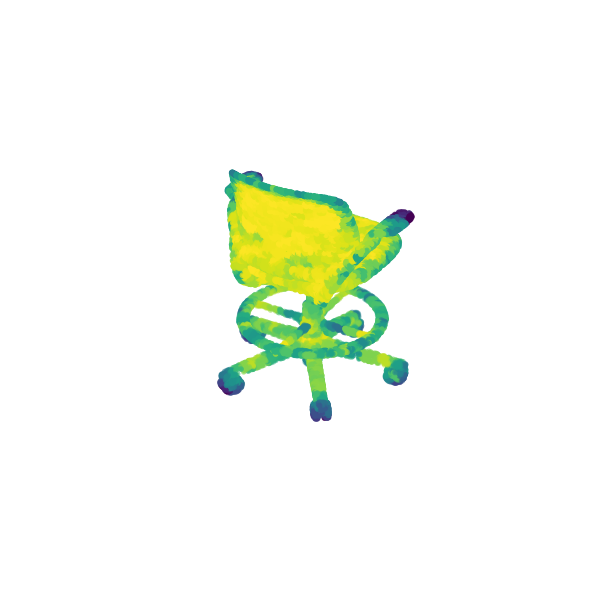

Single plot runtime:  0.4  s.
====
k=60
====
Single shape indicator computation:  3.5  s.


<IPython.core.display.Javascript object>


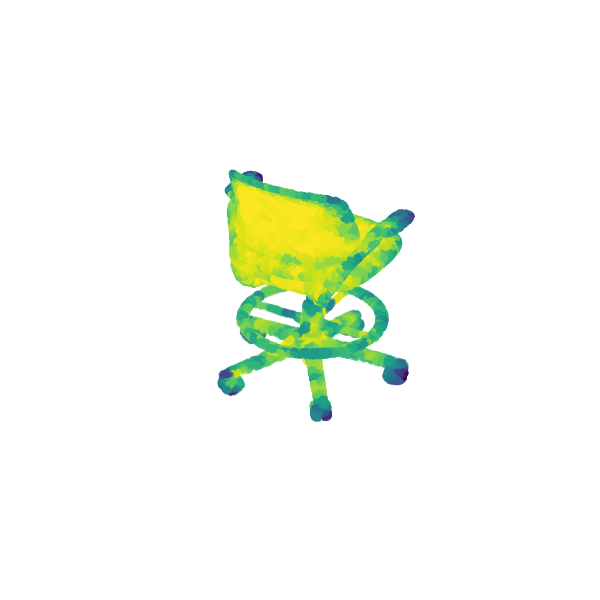

Single plot runtime:  0.4  s.


In [5]:
for k_neighbors in [10,20,30,40,50,60]:
    
    print('====')
    print(f'k={k_neighbors}')
    print('====')
    
    cat = 'chair' # 'chair', 'table', 'car', 'airplane'
    shape_index = 0 # index in the directory of meshes

    indicator = 'ks_log_pvalues' # 'ks_log_pvalues', 'pauly'

    save_to = None

    n_surface_points = 2000
    decision_threshold = None

    n_plot_points = 30000
    rotate_yz=True

    mesh = load_shapenet_mesh(cat, shape_index)

    t0=T.time()
    points, indicator_values = sample_surface_and_compute_indicator(mesh, n_surface_points, k_neighbors, indicator, decision_threshold)
    print('Single shape indicator computation: ', str(np.round(T.time()-t0,1)), ' s.')

    t0=T.time()
    plot_indicator_on_surface(mesh, points, indicator_values, n_plot_points, rotate_yz=rotate_yz, figsize=(3,3), save_to=save_to)
    print('Single plot runtime: ', str(np.round(T.time()-t0,1)), ' s.')

## Choice of decision threshold

====
decision_threshold=0.3
====
Single shape indicator computation:  2.1  s.


<IPython.core.display.Javascript object>


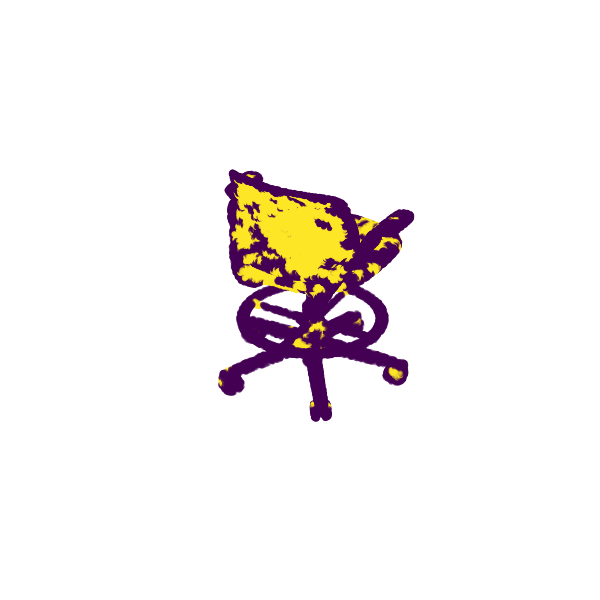

Single plot runtime:  0.4  s.
====
decision_threshold=0.5
====
Single shape indicator computation:  2.1  s.


<IPython.core.display.Javascript object>


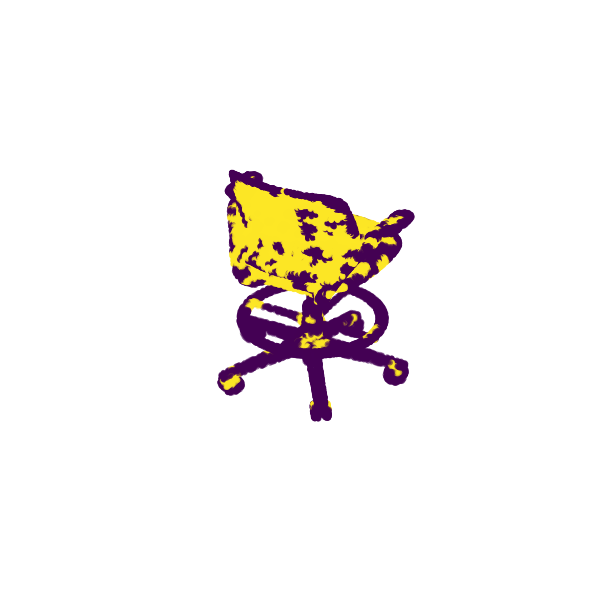

Single plot runtime:  0.4  s.
====
decision_threshold=0.7
====
Single shape indicator computation:  1.9  s.


<IPython.core.display.Javascript object>


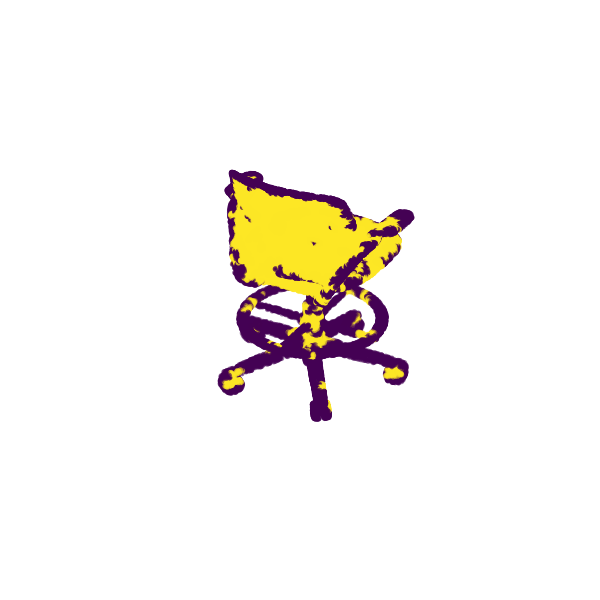

Single plot runtime:  0.4  s.
====
decision_threshold=1
====
Single shape indicator computation:  1.8  s.


<IPython.core.display.Javascript object>


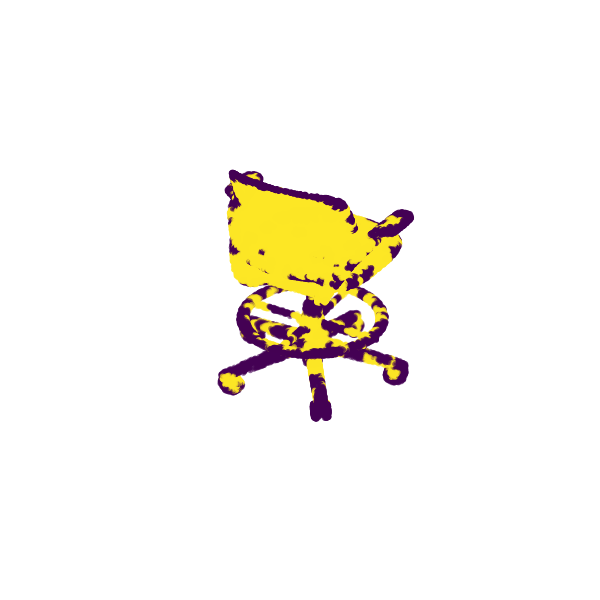

Single plot runtime:  0.4  s.
====
decision_threshold=1.3
====
Single shape indicator computation:  1.8  s.


<IPython.core.display.Javascript object>


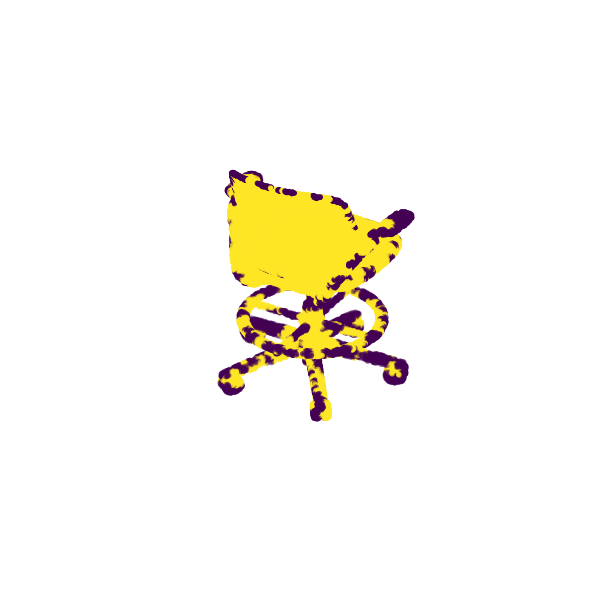

Single plot runtime:  0.4  s.
====
decision_threshold=1.7
====
Single shape indicator computation:  1.8  s.


<IPython.core.display.Javascript object>


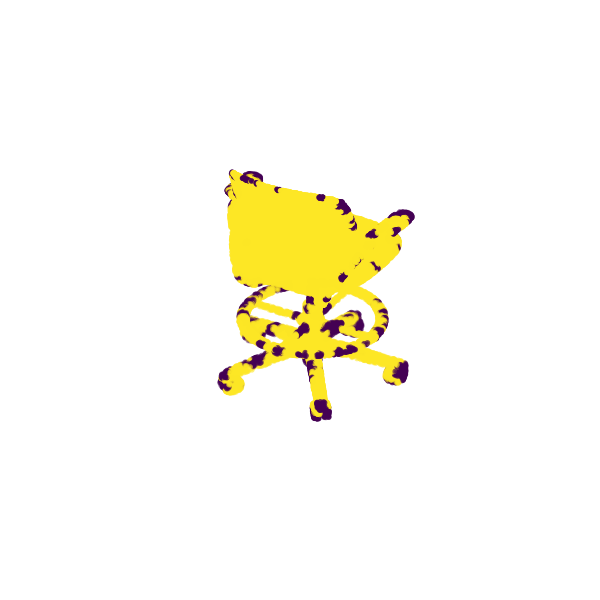

Single plot runtime:  0.4  s.
====
decision_threshold=2
====
Single shape indicator computation:  1.8  s.


<IPython.core.display.Javascript object>


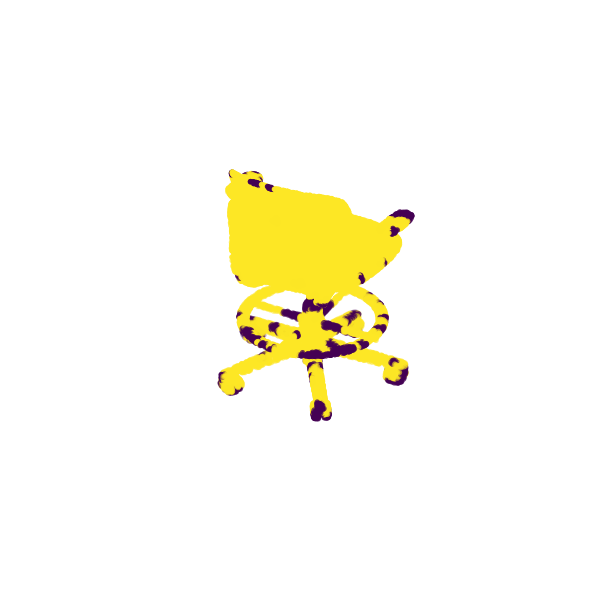

Single plot runtime:  0.4  s.


In [7]:
for decision_threshold in [.3, .5, .7, 1, 1.3, 1.7, 2]:
# for decision_threshold in [.05, .1, .15, .2, .3]:
    
    print('====')
    print(f'decision_threshold={decision_threshold}')
    print('====')
    
    cat = 'chair' # 'chair', 'table', 'car', 'airplane'
    shape_index = 0 # index in the directory of meshes

    indicator = 'ks_log_pvalues' # 'ks_log_pvalues', 'pauly'

    save_to = None

    n_surface_points = 2000
    k_neighbors = 30

    n_plot_points = 30000
    rotate_yz=True

    mesh = load_shapenet_mesh(cat, 0)

    t0=T.time()
    points, indicator_values = sample_surface_and_compute_indicator(mesh, n_surface_points, k_neighbors, indicator, decision_threshold)
    print('Single shape indicator computation: ', str(np.round(T.time()-t0,1)), ' s.')

    t0=T.time()
    plot_indicator_on_surface(mesh, points, indicator_values, n_plot_points, rotate_yz=rotate_yz, figsize=(3,3), save_to=save_to)
    print('Single plot runtime: ', str(np.round(T.time()-t0,1)), ' s.')

## Mosaic for choice of choice of $k_{neighbors}$

In [8]:
def choose_k_mosaic(figsize, k_list, indicator, shape_index, save_to=None):
    
    n_surface_points = 2000
    n_plot_points = 30000
    rotate_yz=True
    
    # Global figure
    fig = plt.figure(figsize=figsize)
    
    # Shape count for progression verbose
    shape_count = 0
    print(f'Computing indicator and preparing mosaic with {4*len(k_list)} shapes:')
    
    for i, cat in enumerate(['chair', 'car', 'table', 'airplane']):
        for j, k_neighbors in enumerate(k_list):
            
            print(f'Preparing shape {shape_count+1}/{(4*len(k_list))}...', end = '\r')

            mesh = load_shapenet_mesh(cat, shape_index)
            
            points, indicator_values = sample_surface_and_compute_indicator(
                mesh, 
                n_surface_points, 
                k_neighbors, 
                indicator, 
                decision_threshold=None
            )
            
            plot_points = np.array(sample_surface(mesh, n_plot_points)[0])
            indicator_plot_points = find_closest_indicator_value(plot_points, points, indicator_values)
            plot_points = rotate_yz_plane(plot_points)
            
            ax = fig.add_subplot(4, len(k_list), len(k_list)*i+j+1, projection='3d')
            ax.scatter(plot_points[:, 0], plot_points[:, 1], plot_points[:, 2], c=indicator_plot_points, cmap='viridis_r', s=.5)
            ax.set_xlim(-.3,.3)
            ax.set_ylim(-.3,.3)
            ax.set_zlim(-.3,.3)
            ax.axis('off')
            
            if i == 0:
                ax.set_title(r'$k=$'+str(k_neighbors), fontsize=25)
                
            shape_count += 1
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0, wspace=0)
    
    if save_to is not None:
        plt.savefig(save_to, dpi=100)
    
    plt.show()       

Computing indicator and preparing mosaic with 24 shapes:


<IPython.core.display.Javascript object>


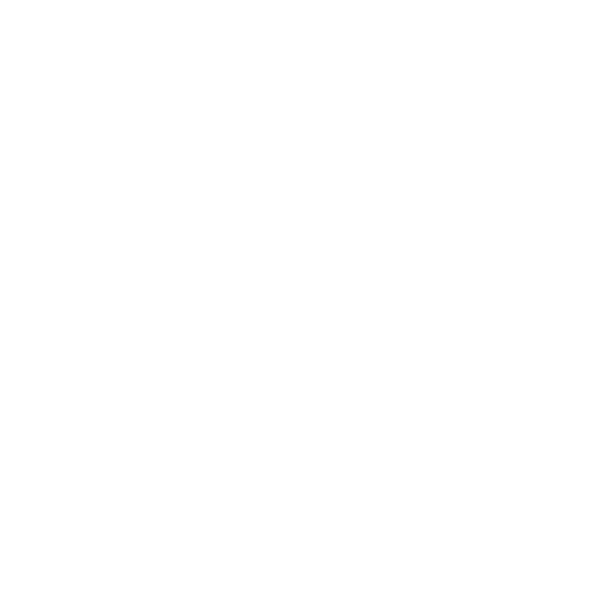

<IPython.core.display.Javascript object>


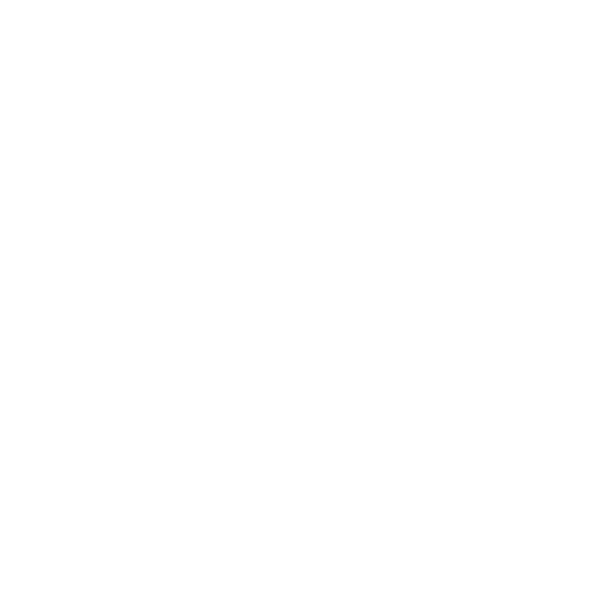

<IPython.core.display.Javascript object>


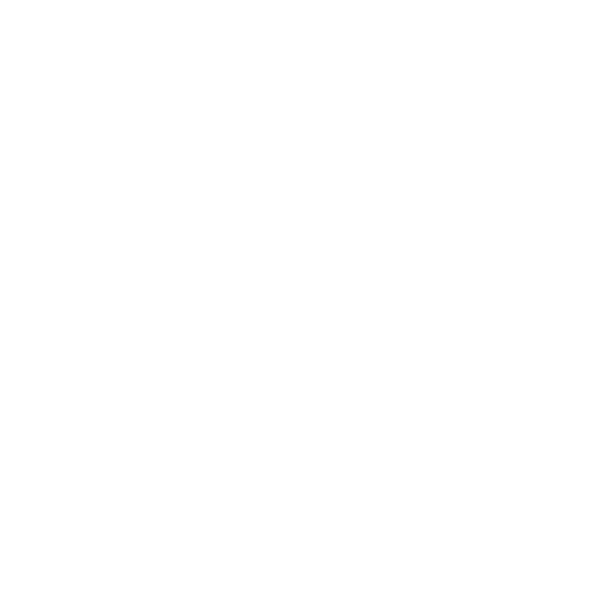

<IPython.core.display.Javascript object>


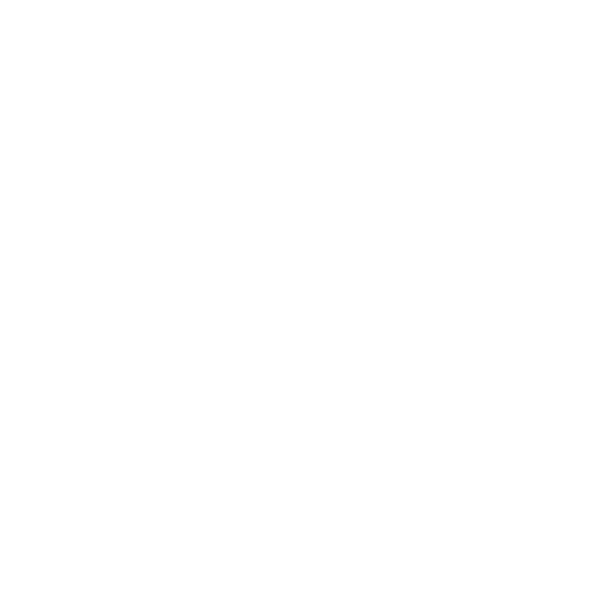

<IPython.core.display.Javascript object>


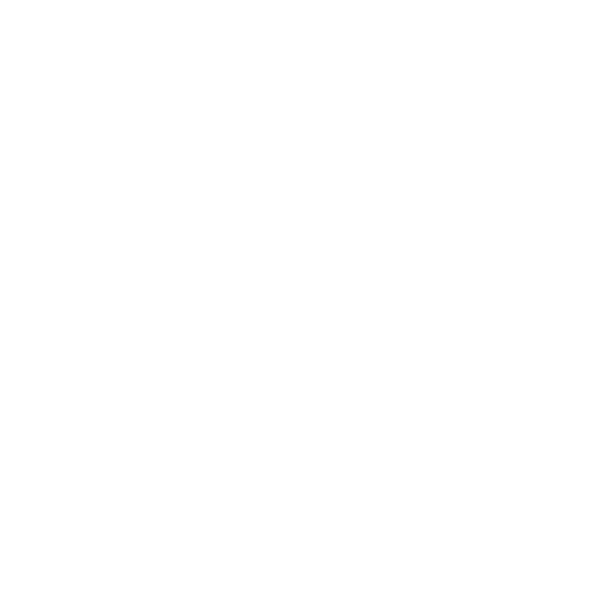

<IPython.core.display.Javascript object>


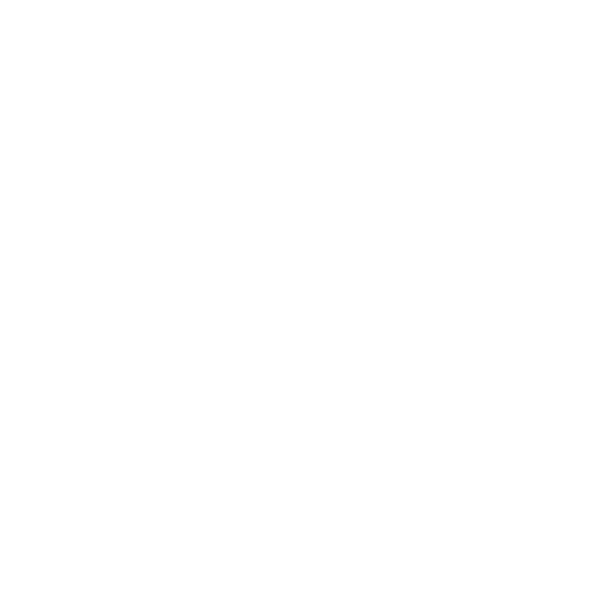

<IPython.core.display.Javascript object>


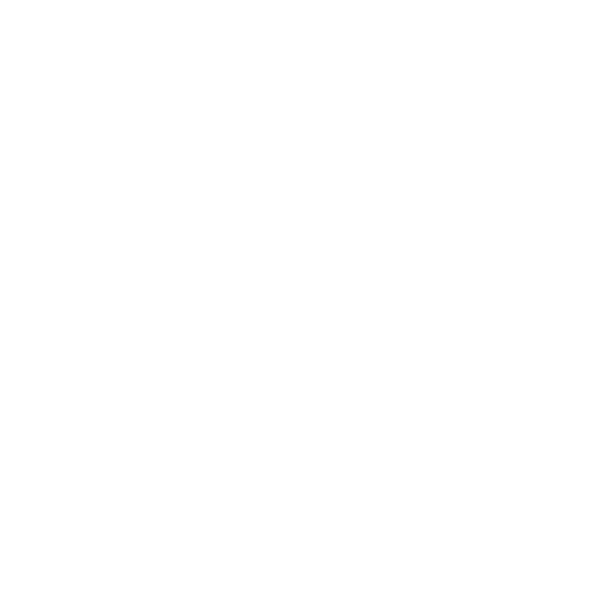

<IPython.core.display.Javascript object>


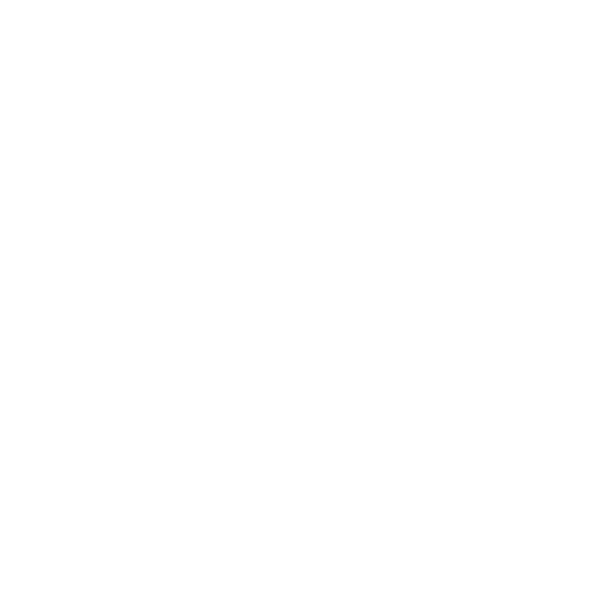

<IPython.core.display.Javascript object>


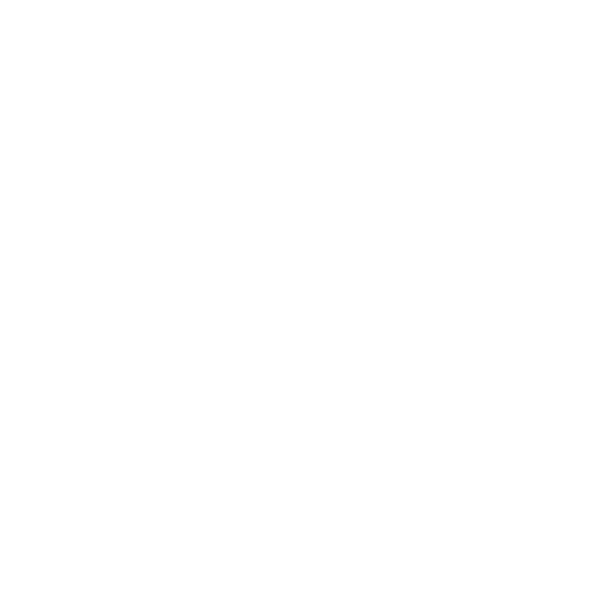

<IPython.core.display.Javascript object>


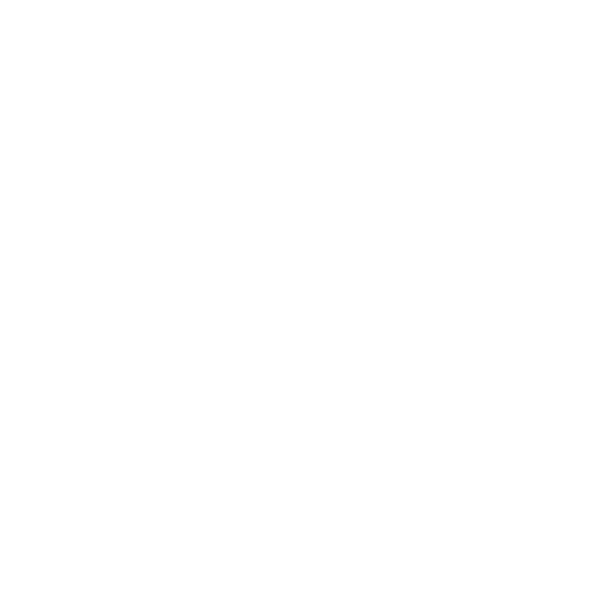

<IPython.core.display.Javascript object>


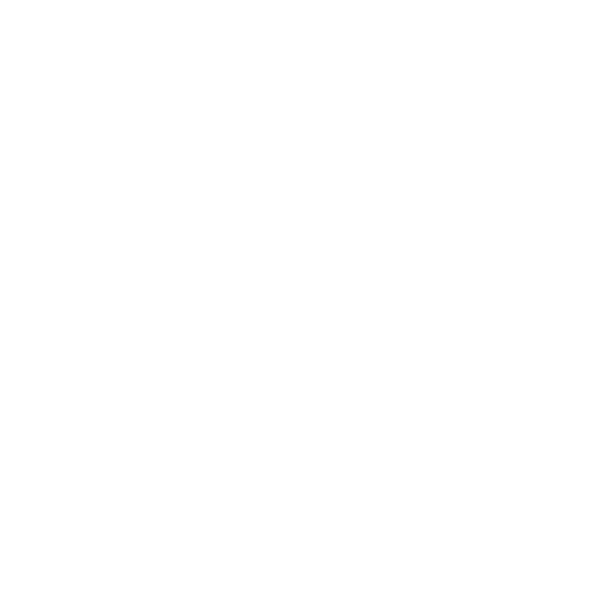

<IPython.core.display.Javascript object>


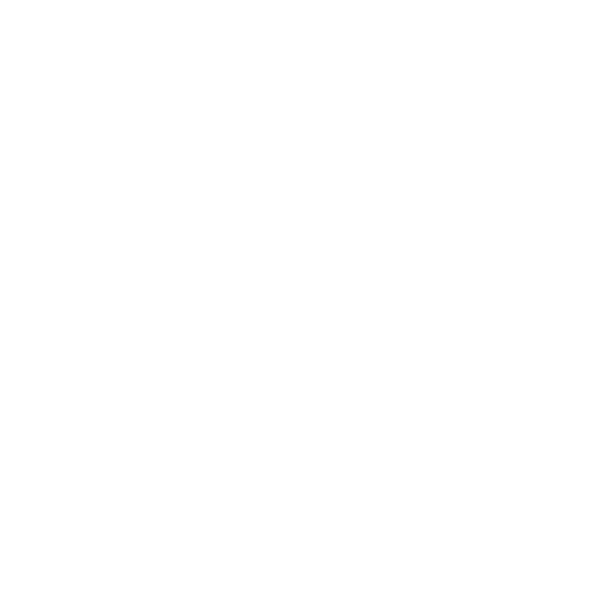

<IPython.core.display.Javascript object>


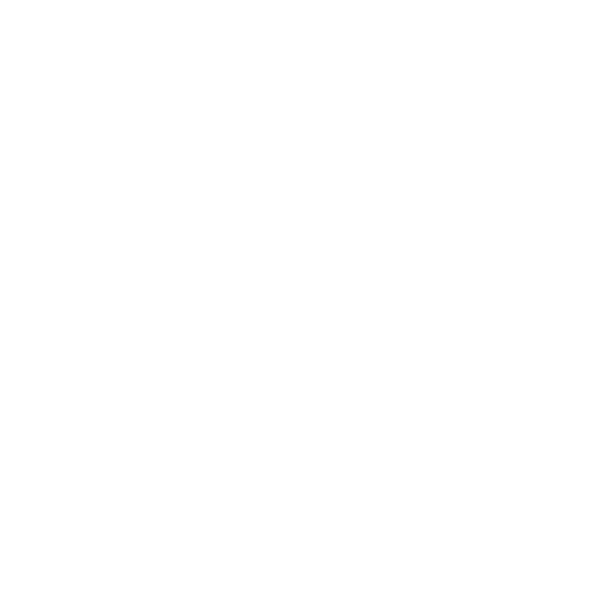

<IPython.core.display.Javascript object>


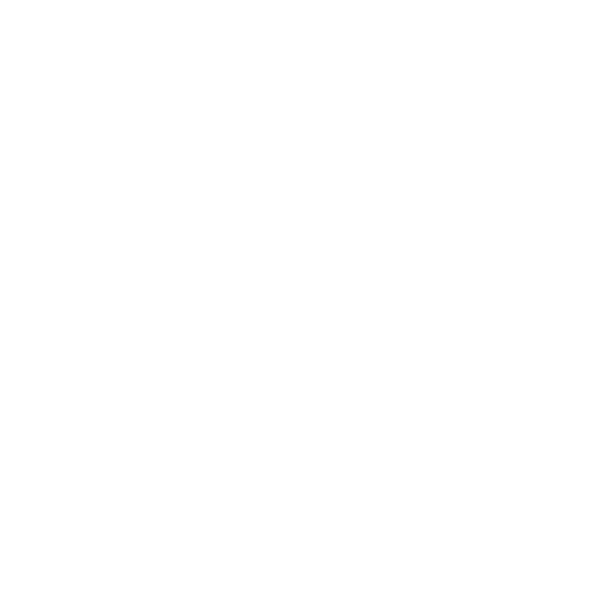

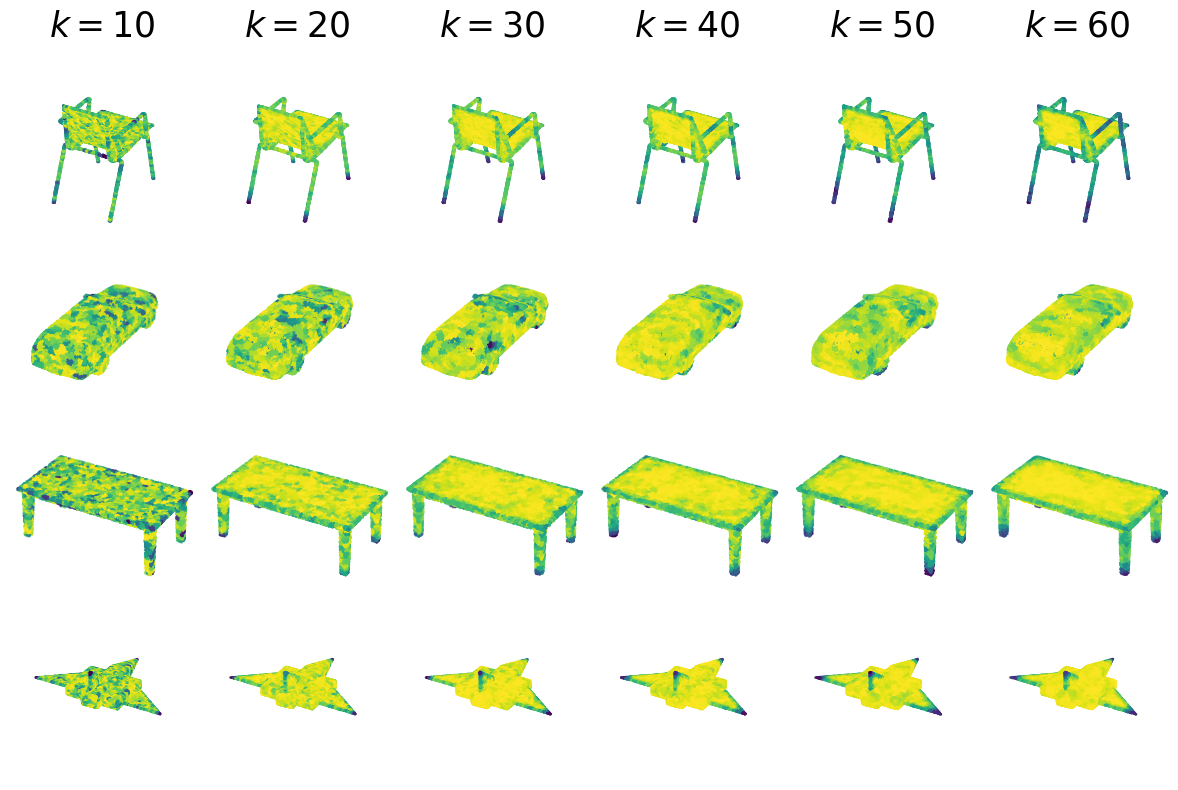

In [9]:
%matplotlib inline
# choose_k_mosaic(figsize=(12,8), k_list=[10,20,30,40,50,60], indicator='ks_log_pvalues', shape_index=4, save_to='./figures/mosaic_choice_of_k.png')
choose_k_mosaic(
    figsize=(12,8), 
    k_list=[10,20,30,40,50,60], 
    indicator='ks_log_pvalues', 
    shape_index=4, 
    save_to=None
)

## Mosaic for choice of decision threshold

In [10]:
def choose_decision_threshold_mosaic(figsize, decision_threshold_list, k_neighbors, indicator, shape_index, save_to=None):
    
    n_surface_points = 2000
    n_plot_points = 30000
    rotate_yz=True
    
    # Global figure
    fig = plt.figure(figsize=figsize)
    
    # Shape count for progression verbose
    shape_count = 0
    print(f'Computing indicator and preparing mosaic with {4*len(decision_threshold_list)} shapes:')
    
    for i, cat in enumerate(['chair', 'car', 'table', 'airplane']):
        for j, decision_threshold in enumerate(decision_threshold_list):

            print(f'Preparing shape {shape_count+1}/{(4*len(decision_threshold_list))}...', end = '\r')
            
            mesh = load_shapenet_mesh(cat, shape_index)
            
            points, indicator_values = sample_surface_and_compute_indicator(
                mesh, 
                n_surface_points, 
                k_neighbors, 
                indicator, 
                decision_threshold
            )
            
            plot_points = np.array(sample_surface(mesh, n_plot_points)[0])
            indicator_plot_points = find_closest_indicator_value(plot_points, points, indicator_values)
            plot_points = rotate_yz_plane(plot_points)
            
            ax = fig.add_subplot(4, len(decision_threshold_list), len(decision_threshold_list)*i+j+1, projection='3d')
            ax.scatter(plot_points[:, 0], plot_points[:, 1], plot_points[:, 2], c=indicator_plot_points, cmap='viridis_r', s=1)
            ax.set_xlim(-.3,.3)
            ax.set_ylim(-.3,.3)
            ax.set_zlim(-.3,.3)
            ax.axis('off')
            
            if i==0:
                ax.set_title(r'$t_0=$'+str(decision_threshold), fontsize=25)
                
            shape_count += 1
            
    plt.tight_layout()
    plt.subplots_adjust(hspace=0, wspace=0)
    
    if save_to is not None:
        plt.savefig(save_to, dpi=100)
    
    plt.show()       

Computing indicator and preparing mosaic with 20 shapes:


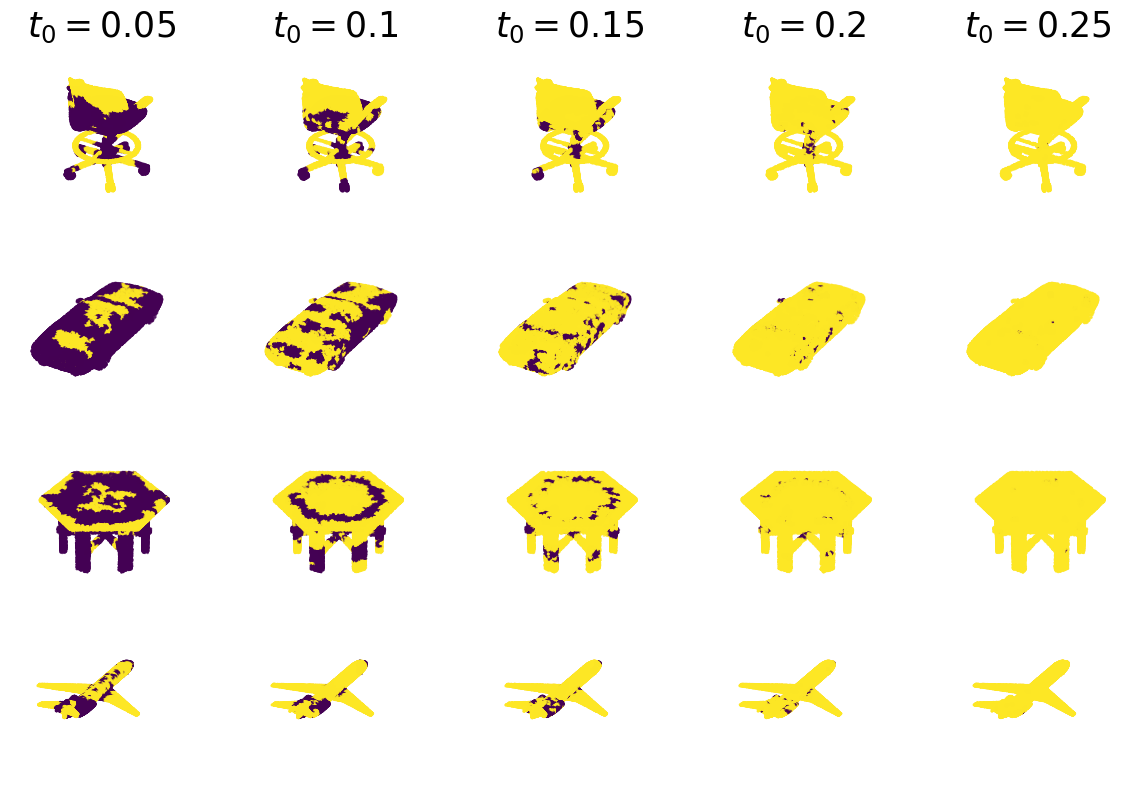

In [11]:
%matplotlib inline
# choose_decision_threshold_mosaic(figsize=(12,8), decision_threshold_list=[.3,.7,1,1.3,1.7,2], k_neighbors=30, indicator='ks_log_pvalues', shape_index=4, save_to='./figures/mosaic_choice_of_t0.png')
choose_decision_threshold_mosaic(
    figsize=(12,8), 
    decision_threshold_list=[.05, .1, .15, .2, .25], 
    k_neighbors=30, 
    indicator='pauly', 
    shape_index=0, 
    save_to=None
)


## Mosaic HF vs. Pauly

In [17]:
def compare_HF_Pauly_mosaic(figsize, n_shapes, cats, t_hf, t_pauly, save_to=None):
    
    n_surface_points = 2000
    k_neighbors = 30
    n_plot_points = 30000
    rotate_yz=True
    
    # Global figure
    fig = plt.figure(figsize=figsize)
    
    # Shape count for progression verbose
    shape_count = 0
    print(f'Computing indicator and preparing mosaic with {2*n_shapes*len(cats)} shapes:')
    
    for i, cat in enumerate(cats):
        for shape_index in range(n_shapes):
            
            print(f'Preparing shape {shape_count+1}/{2*n_shapes*len(cats)}...', end = '\r')

            mesh = load_shapenet_mesh(cat, shape_index)
            
            points, indicator_values = sample_surface_and_compute_indicator(
                mesh, 
                n_surface_points, 
                k_neighbors, 
                'pauly', 
                decision_threshold=t_pauly
            )
            
            plot_points = np.array(sample_surface(mesh, n_plot_points)[0])
            indicator_plot_points = find_closest_indicator_value(plot_points, points, indicator_values)
            plot_points = rotate_yz_plane(plot_points)
            
            mult = i if i<=1 else i+2
            ax = fig.add_subplot(len(cats), 2*n_shapes, mult*n_shapes+1 + shape_index, projection='3d')
            ax.scatter(plot_points[:, 0], plot_points[:, 1], plot_points[:, 2], c=indicator_plot_points, cmap='viridis_r', s=1)
            ax.set_xlim(-.3,.3)
            ax.set_ylim(-.3,.3)
            ax.set_zlim(-.3,.3)
            ax.axis('off')
            
            shape_count += 1
            print(f'Preparing shape {shape_count+1}/{2*n_shapes*len(cats)}...', end = '\r')
            
            points, indicator_values = sample_surface_and_compute_indicator(
                mesh, 
                n_surface_points, 
                k_neighbors, 
                'ks_log_pvalues', 
                decision_threshold=t_hf
            )
            
            plot_points = np.array(sample_surface(mesh, n_plot_points)[0])
            indicator_plot_points = find_closest_indicator_value(plot_points, points, indicator_values)
            plot_points = rotate_yz_plane(plot_points)
            
            mult = i+2 if i<=1 else i+4
            ax = fig.add_subplot(len(cats), 2*n_shapes, mult*n_shapes+1 + shape_index, projection='3d')
            ax.scatter(plot_points[:, 0], plot_points[:, 1], plot_points[:, 2], c=indicator_plot_points, cmap='viridis_r', s=1)
            ax.set_xlim(-.3,.3)
            ax.set_ylim(-.3,.3)
            ax.set_zlim(-.3,.3)
            ax.axis('off')
            
            shape_count += 1
            
    plt.tight_layout()
    plt.subplots_adjust(hspace=0, wspace=0)
    
    if save_to is not None:
        plt.savefig(save_to, dpi=100)
    
    plt.show()       

Computing indicator and preparing mosaic with 48 shapes:


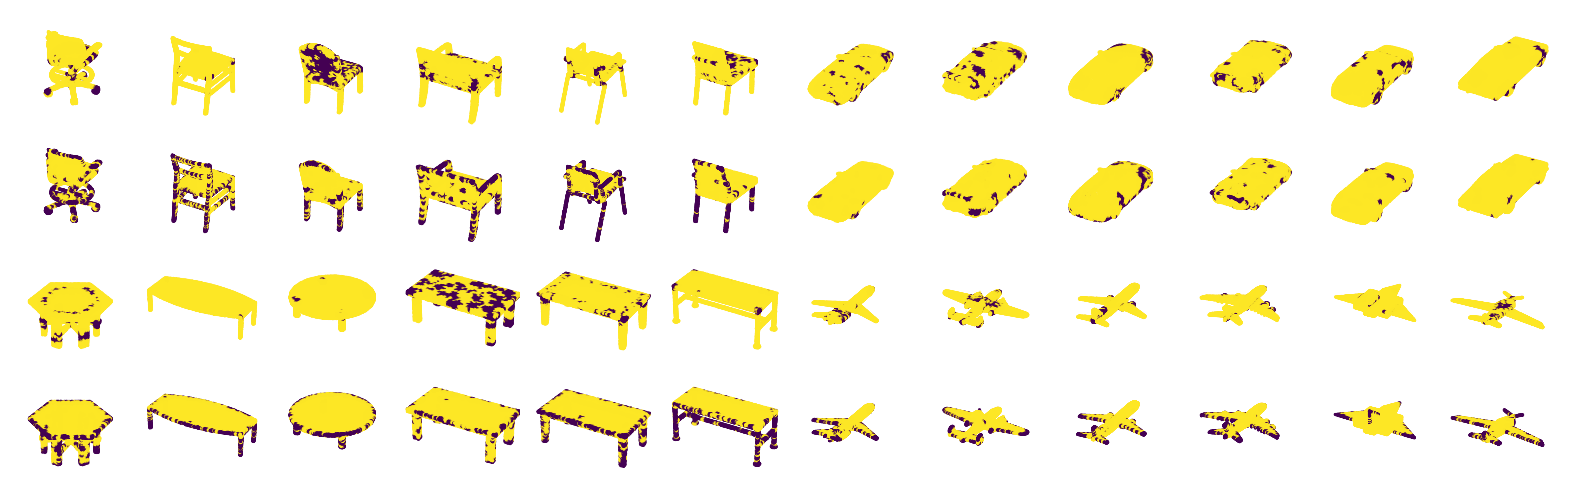

In [15]:
cats = ['chair', 'car', 'table', 'airplane']
# compare_HF_Pauly_mosaic(figsize=(16,5), n_shapes=6, cats=cats, t_hf=1.3, t_pauly=.1, save_to='./figures/mosaic_hf_vs_pauly.png')
compare_HF_Pauly_mosaic(figsize=(16,5), n_shapes=6, cats=cats, t_hf=1.3, t_pauly=.1, save_to=None)

## Mosaic HF vs. Pauly (wihout thresholding)

Computing indicator and preparing mosaic with 48 shapes:


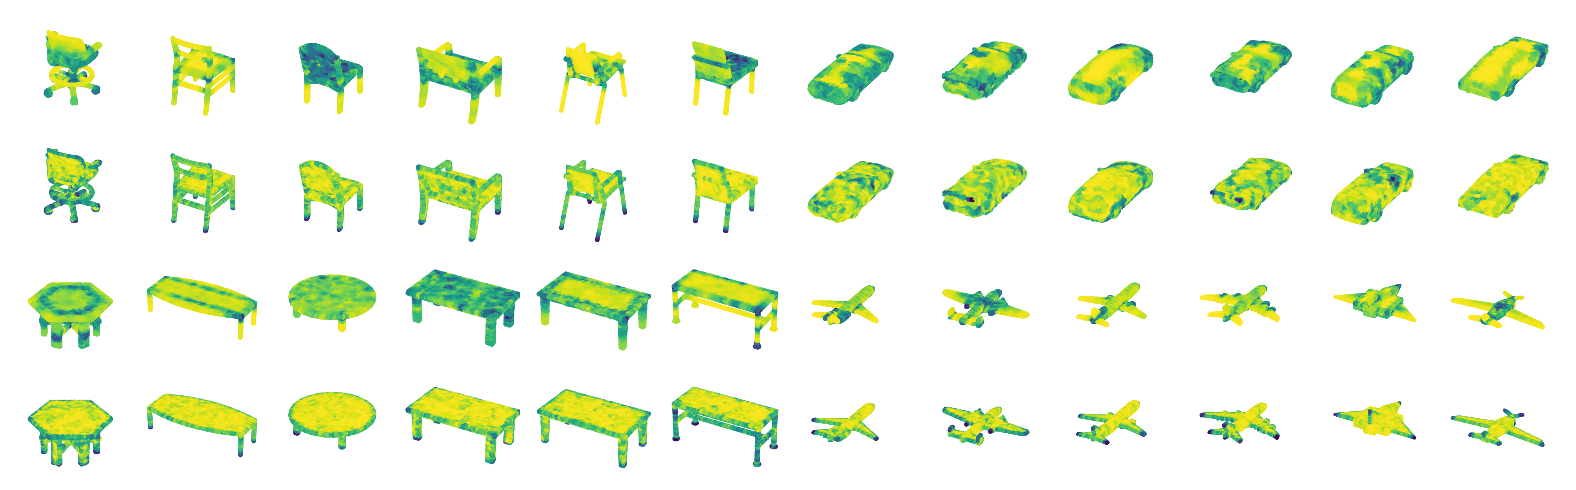

In [20]:
compare_HF_Pauly_mosaic(figsize=(16,5), n_shapes=6, cats=cats, t_hf=None, t_pauly=None, save_to='./figures/mosaic_hf_vs_pauly.png')